In [1]:
"""
@author: SINDHU
"""
#Breast cancer prediction using Artificial Neural Network from Scratch
#ArtificialNeuralNetwork

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run Utils.ipynb

In [2]:
#importing dataset
dataset=pd.read_csv('breast_cancer_dataset.csv')

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#checking for missing values
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
X=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values

In [6]:
print(X)
print(X.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [7]:
print(y.shape)
print(y)

(569,)
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M'

In [8]:
#applying labelencoder to y
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [9]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
print(X)
print(X.shape)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
(569, 30)


In [12]:
#splitting dataset to train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [14]:
X_train=X_train.T
X_test=X_test.T
y_train=y_train.reshape(1,455)
y_test=y_test.reshape(1,114)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 455)
(30, 114)
(1, 455)
(1, 114)


In [16]:
X_train

array([[-1.15800874, -0.94499809,  0.57163772, ..., -1.33239345,
        -1.25173342, -0.74334801],
       [-0.40948202,  0.62606285, -1.03080894, ..., -0.22564372,
        -0.24891439,  1.07984094],
       [-1.1351621 , -0.95474903,  0.50791498, ..., -1.32422512,
        -1.28674204, -0.71872918],
       ...,
       [-0.75548625, -0.605352  , -0.02597997, ..., -0.97581512,
        -1.74506282, -0.27523937],
       [-0.01092926,  0.10393316, -0.19859181, ..., -0.72275273,
        -1.60444316, -1.2760337 ],
       [-0.40485783, -0.40596615, -0.76616896, ..., -0.14329518,
        -1.01720262,  0.1869831 ]])

In [17]:
#defining layer dimensions
layers_dims=np.array([30,15,15,1])

In [18]:
layers_dims

array([30, 15, 15,  1])

In [19]:
#function to train dataset without minibatches
def model_complete_dataset(X, Y, layers_dims, optimizer, learning_rate=0.0007, beta=0.9,
          beta1=0.9, beta2=0.999, epsilon=1e-1, num_epochs=10000, print_cost=True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
                           
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
     # Optimization loop
    for i in range(num_epochs):
        
           # Forward propagation
        aL, caches = forward_propagation(X, parameters)

            # Compute cost
        cost = compute_cost(aL, Y)

            # Backward propagation
        grads = backward_propogation(aL, Y, caches)

            # Update parameters
        if optimizer == "gd":
            parameters = update_parameters_with_gd(parameters, grads, learning_rate)
        elif optimizer == "momentum":
            parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
        elif optimizer == "adam":
            t = t + 1 # Adam counter
            parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print("Cost after epoch %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters
   

In [20]:
#function to train dataset in mini batches
def model(X, Y, layers_dims, optimizer, learning_rate=0.0007, mini_batch_size=32, beta=0.9,
          beta1=0.9, beta2=0.999, epsilon=1e-1, num_epochs=10000, print_cost=True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    m=X.shape[1]                      
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
     # Optimization loop
    for i in range(num_epochs):
        
        cost=0
        minibatches = random_mini_batches(X, Y, mini_batch_size)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            aL, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost
            cost += compute_cost(aL, minibatch_Y)

            # Backward propagation
            grads = backward_propogation(aL, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        cost_avg=cost/m
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print("Cost after epoch %i: %f" % (i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Cost after epoch 0: 0.910645
Cost after epoch 1000: 0.446046
Cost after epoch 2000: 0.311487
Cost after epoch 3000: 0.236467
Cost after epoch 4000: 0.192811
Cost after epoch 5000: 0.165130
Cost after epoch 6000: 0.145241
Cost after epoch 7000: 0.130325
Cost after epoch 8000: 0.118771
Cost after epoch 9000: 0.109712


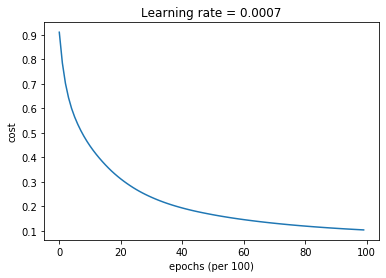

In [21]:
parameters=model_complete_dataset(X_train, y_train, layers_dims,optimizer="gd", learning_rate=0.0007,beta=0.9,beta1=0.9, beta2=0.999, epsilon=1e-8, num_epochs=10000, print_cost=True)

In [22]:
y_pred=predict(X_test,y_test,parameters)

Accuracy: 0.9561403508771931


In [24]:
y_pred_train=predict(X_train,y_train,parameters)

Accuracy: 0.9692307692307689


In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.T,y_pred.T)
cm

array([[65,  2],
       [ 3, 44]], dtype=int64)

Cost after epoch 0: 0.659689
Cost after epoch 1000: 0.371933
Cost after epoch 2000: 0.250797
Cost after epoch 3000: 0.189421
Cost after epoch 4000: 0.156010
Cost after epoch 5000: 0.135008
Cost after epoch 6000: 0.120391
Cost after epoch 7000: 0.109652
Cost after epoch 8000: 0.101502
Cost after epoch 9000: 0.094926


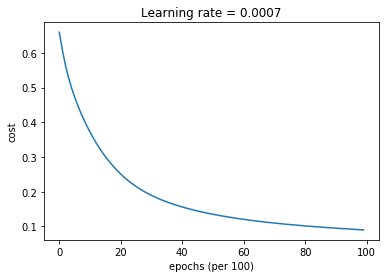

In [27]:
parameters=model_complete_dataset(X_train, y_train, layers_dims,optimizer="momentum", learning_rate=0.0007,beta=0.9,beta1=0.9, beta2=0.999, epsilon=1e-8, num_epochs=10000, print_cost=True)

In [28]:
y_pred_t=predict(X_test,y_test,parameters)

Accuracy: 0.956140350877193


In [29]:
y_pred_tr=predict(X_train,y_train,parameters)

Accuracy: 0.9736263736263733


In [35]:
cm=confusion_matrix(y_test.T,y_pred_t.T)
cm

array([[64,  3],
       [ 2, 45]], dtype=int64)

Cost after epoch 0: 1.179793
Cost after epoch 1000: 0.182585
Cost after epoch 2000: 0.125236
Cost after epoch 3000: 0.102823
Cost after epoch 4000: 0.087996
Cost after epoch 5000: 0.077213
Cost after epoch 6000: 0.069476
Cost after epoch 7000: 0.063686
Cost after epoch 8000: 0.059056
Cost after epoch 9000: 0.055230


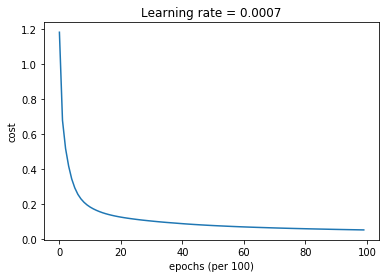

In [31]:
parameters=model_complete_dataset(X_train, y_train, layers_dims,optimizer="adam", learning_rate=0.0007,beta=0.9,beta1=0.9, beta2=0.999, epsilon=1e-1, num_epochs=10000, print_cost=True)

In [32]:
y_prtest=predict(X_test,y_test,parameters)

Accuracy: 0.9473684210526316


In [33]:
y_prtrain=predict(X_train,y_train,parameters)

Accuracy: 0.9890109890109886


In [36]:
cm=confusion_matrix(y_test.T,y_prtest.T)
cm

array([[65,  2],
       [ 4, 43]], dtype=int64)

Cost after epoch 0: 0.037949
Cost after epoch 1000: 0.012562
Cost after epoch 2000: 0.006979
Cost after epoch 3000: 0.005144
Cost after epoch 4000: 0.004082
Cost after epoch 5000: 0.003630
Cost after epoch 6000: 0.003145
Cost after epoch 7000: 0.003189
Cost after epoch 8000: 0.002765
Cost after epoch 9000: 0.002705


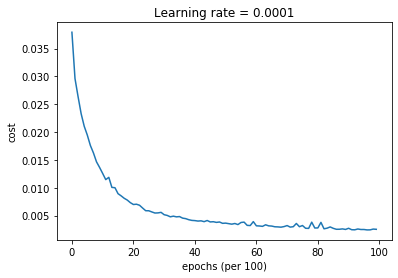

In [46]:
parameters=model(X_train, y_train, layers_dims,optimizer="momentum", learning_rate=0.0001,mini_batch_size=30,beta=0.9,beta1=0.9, beta2=0.999, epsilon=1e-7, num_epochs=10000, print_cost=True)

In [47]:
y_prtest=predict(X_test,y_test,parameters)

Accuracy: 0.956140350877193


In [48]:
y_prtrain=predict(X_train,y_train,parameters)

Accuracy: 0.9802197802197798


In [49]:
cm=confusion_matrix(y_test.T,y_prtest.T)
cm

array([[64,  3],
       [ 2, 45]], dtype=int64)